In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from pathlib import Path

# path: the path relative to desktop
def plt_savefig(path):

    return plt.savefig(
        (Path('~/Desktop') / path).expanduser(),
        bbox_inches='tight',  # or the labels will be cut
        dpi=600
    )

In [4]:
print(sm.datasets.fair.SOURCE,
      sm.datasets.fair.NOTE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm
 ::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

In [5]:
# -> Pandas's Dataframe
df_fair = sm.datasets.fair.load_pandas().data

In [6]:
df = df_fair
# 2: poor
# 3: fair
df = df.assign(poor_marriage_yn
               =(df.rate_marriage <= 2))
df_fair_2 = df

In [7]:
df = df_fair_2

display(df
        .groupby('poor_marriage_yn')
        .affairs
        .describe())

a = df[df.poor_marriage_yn].affairs
b = df[~df.poor_marriage_yn].affairs

# ttest_ind(...) === Student's t-test
# ttest_ind(..., equal_var=False) === Welch's t-test
print('p-value:',
      sp.stats.ttest_ind(a, b, equal_var=False)[1])

,count,mean,std,min,25%,50%,75%,max
poor_marriage_yn,,,,,,,,
False,5919.0,0.643549,2.116982,0.0,0.0,0.000000,0.347826,57.599991
True,447.0,1.524038,3.015937,0.0,0.0,0.532609,1.507691,26.879990


p-value: 2.7446844166802127e-09


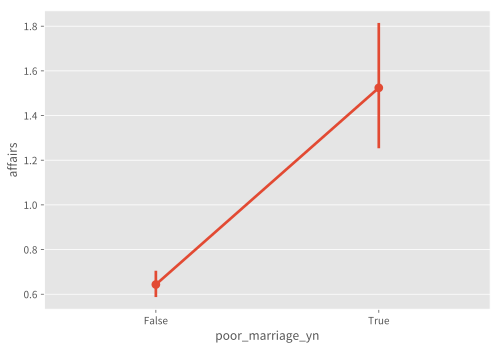

In [8]:
df = df_fair_2

sns.pointplot(x=df.poor_marriage_yn,
              y=df.affairs)

# plt_savefig('pointplot_poor_marriage_yn_affairs.png')

In [9]:
df = df_fair
# 2: farming-like
# 3: white-colloar
df = df[df.occupation.isin([2, 3])]
df_fair_3 = df

In [10]:
df = df_fair_3

display(df
        .groupby('occupation')
        .affairs
        .describe())

a = df[df.occupation == 2].affairs
b = df[df.occupation == 3].affairs

print('p-value:',
      sp.stats.ttest_ind(a, b, equal_var=False)[1])

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
2.0,859.0,0.719556,2.375644,0.0,0.0,0.0,0.212121,26.879990
3.0,2783.0,0.755248,2.305594,0.0,0.0,0.0,0.583333,57.599991


p-value: 0.698381462473247


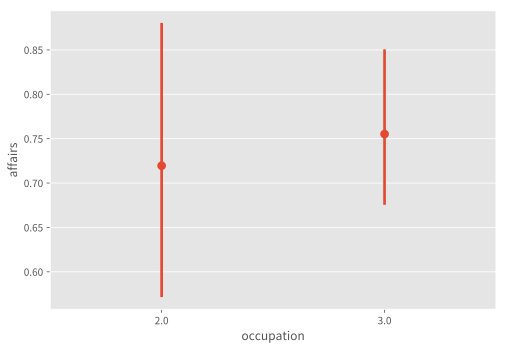

In [11]:
df = df_fair_3

sns.pointplot(x=df.occupation,
              y=df.affairs,
              join=False)

# plt_savefig('pointplot_occupation23_affairs.png')

In [12]:
print('p-value:',
      sp.stats.ttest_ind([1, 2, 3, 4, 5, 6],
                         [1, 2, 3, 4, 5, 60],
                         equal_var=False)[1])

p-value: 0.3886465951695389
